# Vectors

#### vectors in NumPy

In [2]:
import numpy as np
v = np.array([3,2])      # 2D vector
u = np.array([5,1,6,2])  # 5D vector

#### adding vectors

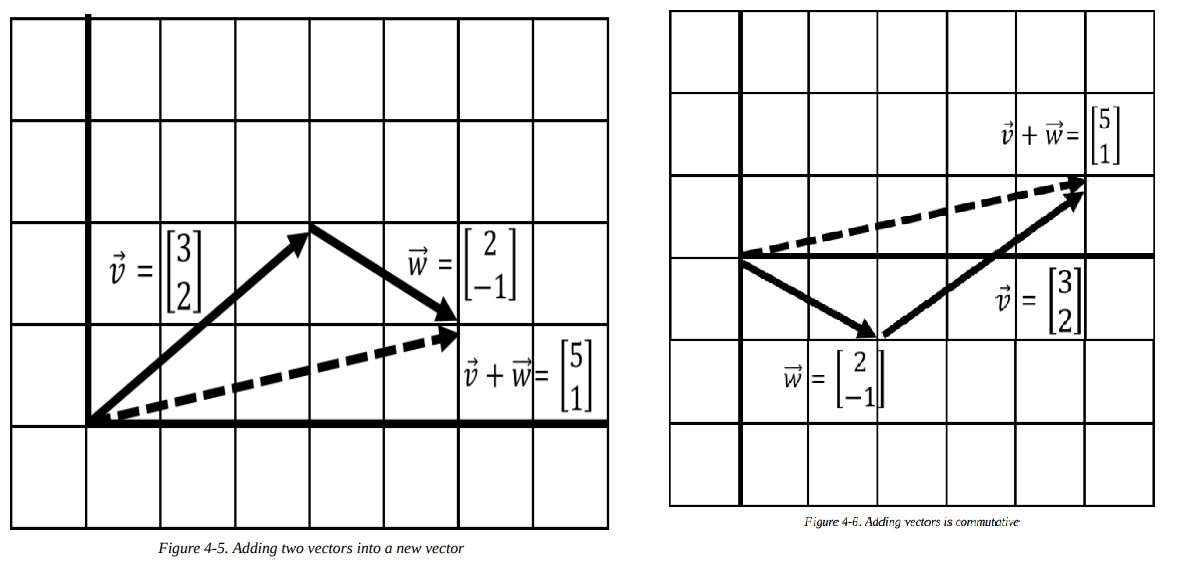

In [3]:
v = np.array([3,2])
w = np.array([2,-1])
z = v + w
print(z)

[5 1]


#### scaling vectors

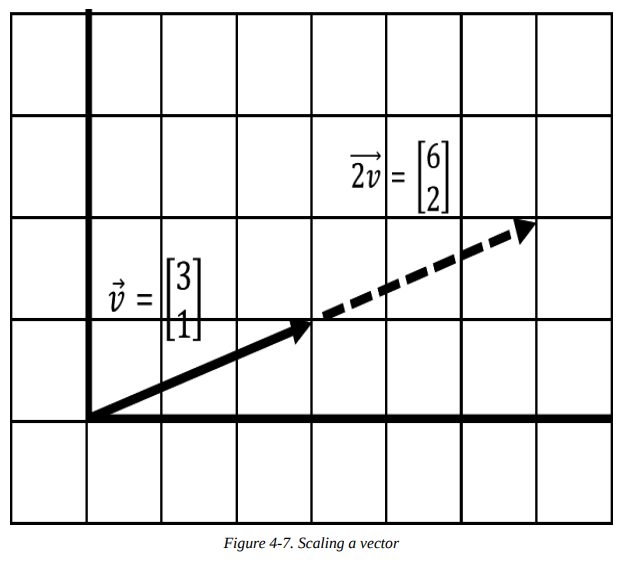

In [4]:
v = np.array([3,1])
v2 = 2*v
print(v2)

[6 2]


#### linearly dependent and independent vectors

When two vectors point into the same direction or even lie on the same line, they are known to be linearly dependent. By adding and scaling these two vectos it is not possible to create a vector that points into another direction. The picture below shows two linearly dependent vectors.

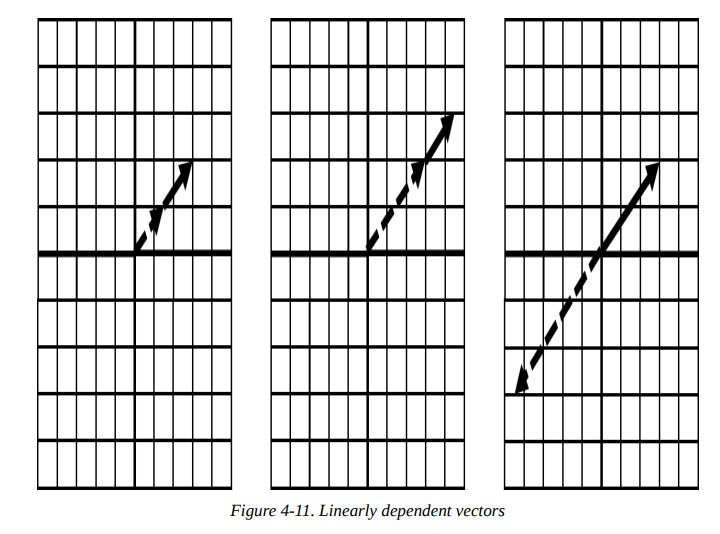

When two vectors point into different directions they are known to be linearly independent. By adding and scaling these two vectors you can create ANY vector. The picture below shows a pair of linearly independent vectors.

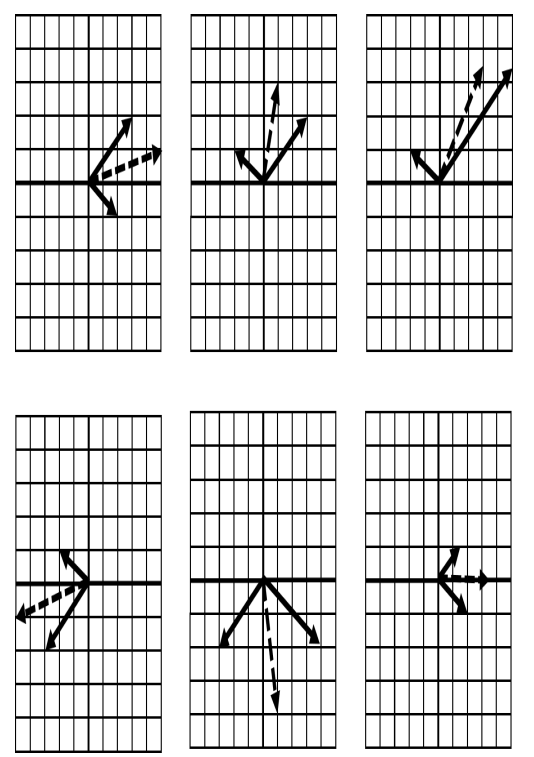

# Linear transformations

The basis of all linear transformations are base vectors i and j. Commonly they have the coordinates i = [1, 0] and j = [0, 1]. They are shown in the picture below.

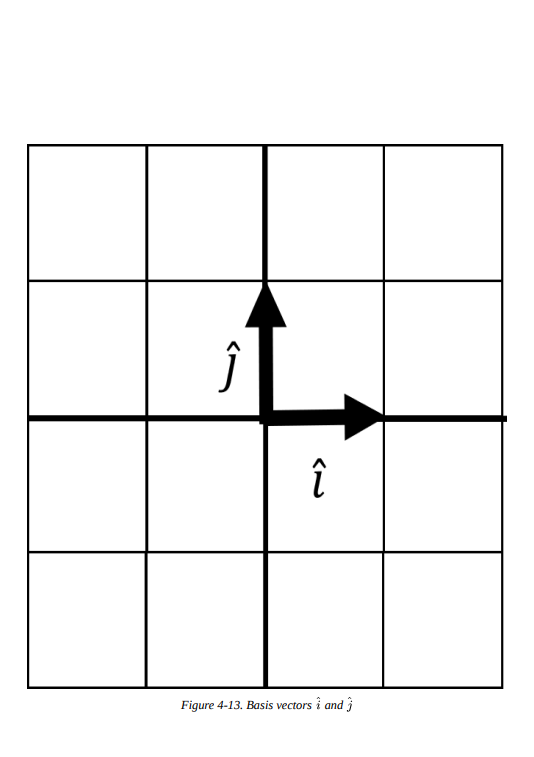

Together the base vectors i and j make up a base matrix [[1, 0], [0,1]] as shown below.

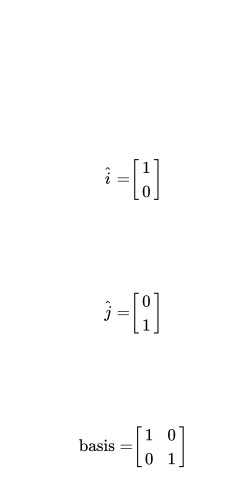

The essence of linear transformations is the question: Since we have a vecotr v = [x, y], how can we transform it into a vector u = [x_new, y_new]. The answer is that we must multiply v by the base matrix. But the base matrix has to be transformed beforhand. These are the legal transformations:

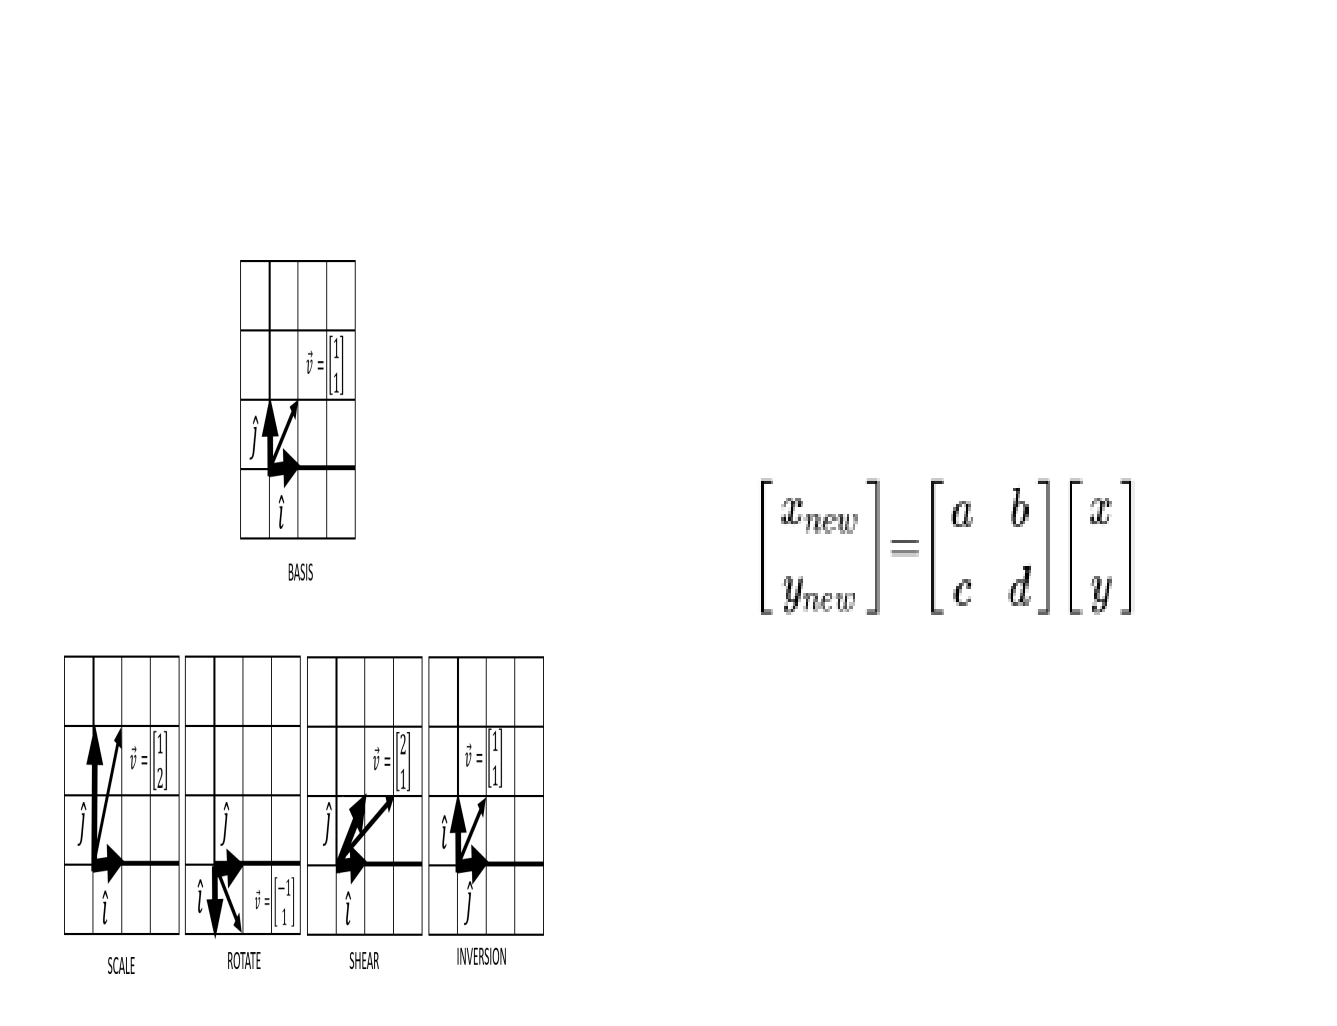

#### linear transformations in NumPy

In [2]:
import numpy as np

# base vectors
i = np.array([1,0])
j = np.array([0,1])

# transform base vecotrs
i_new = 3*i
j_new = 2*j

# create a base matrix
# you have to transpose (change the rows with the columns)
base_mat = np.array([i_new, j_new]).transpose()

# define the vector v
v = np.array([10,10])

# multiply vecotr v by the base matrix to get vector u
u = base_mat.dot(v)
print(u)

[30 20]


# Matrices

#### matrix multiplication

In the previous chapter linear transformations have been introduced. To summarize you apply a transformation (transformation x) to the base vectors, combine them into a matrix (matrix y), and then if you multiply a vector of interest (vector z) by this matrix (matrix y) you literally apply this transformation (transformation x) to the vector of interest (vector z).

So every linear transformation has its own matrix. If we combine two matrices then we combine two linear transformations. If we them multiply this combined matrix by our vecotr of interest, we apply two linear transformations at once (to the vector of interest). Combining two matrices is matrix multiplication.

You can only multiply two matrices A B only if the number of columns of A is equal to the number of rows of B. 

The result of the matrix multiplication will have the same number of rows as the matrix with the smaller number of rows and will have the same number of columns as the matrix with the smaller number of columns.

Matrix multiplication isnt interchangeable, so A x B is not equal to B x A.

#### matrix multiplication in NumPy

In [1]:
import numpy as np

# linear transformation 1
i1 = np.array([0,1])      # transformed base vector
j1 = np.array([-1,0])     # transformed base vector
transform1 = np.array([i1, j1]).transpose()  # transformation matrix

# linear transformation 2
i2 = np.array([1,0])
j2 = np.array([1,1])
transform2 = np.array([i2,j2]).transpose()

# combined linear transformation 1 and 2
# @ is one of the Python operators for matrix multiplication
# note that matrix multiplication is not interchangeable (AxB != BxA)
combined = transform2 @ transform1
print('combined matrix: {}'.format(combined))

# vector of interest
v = np.array([1,2])

# combined linear transformation applied to vector of interest
print('output: {}'.format(combined.dot(v)))


combined matrix: [[ 1 -1]
 [ 1  0]]
output: [-1  1]


#### matrix determinants

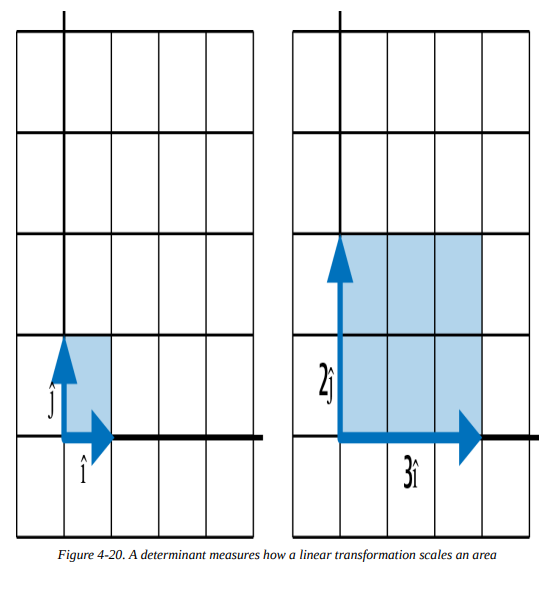

The determinant of a matrix tells you by how much the area of the matrix (made up of two base vetors) changes after a given transformation. In the example above we can see that before the transformation the area is 1 and after the transformation the area is 6. The determinant of the right matrix is equal to 6 and indeed 1x6 = 6.

Often you want to test if a determinant is equal to 0. If the determinant is equal to 0 this means that the linear transformation is linearly dependent and you have most probably encountered an usnolvable math problem.

#### matrix determinant in NumPy

In [3]:
import numpy as np
from numpy.linalg import det

# transformation
i = np.array([3,0])  # linearly transformed vector
j = np.array([0,2])  # linearly transformed vector
mat = np.array([i,j]).transpose()  # transformation matrix

# determinant
determinant = det(mat)
print('determinant: {}'.format(determinant))

determinant: 6.0


# Systems of equations and inverse matrices

A non-matrix notation of a system of equations:

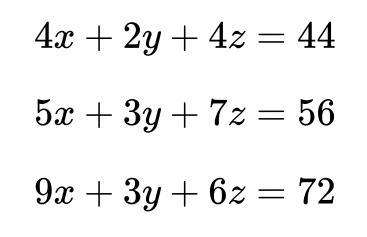

We can rewrite this in matrix notation:

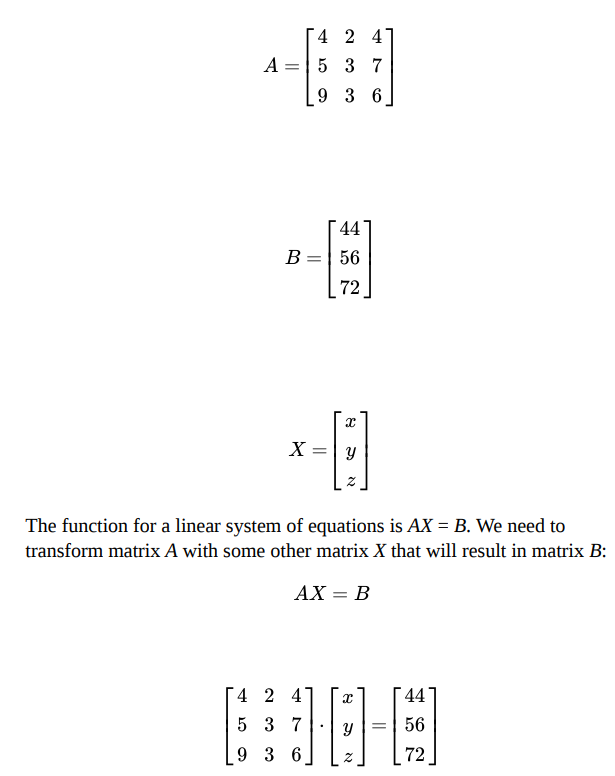

So to solve for x, we want x to be alone on one side of the equality sign. To achieve this we need to get rid of A. We can do this by multiplying A by it's inverse A^-1. Any matrix multiplied by its inverse results in an identity matrix, so it basically cancells itself out.

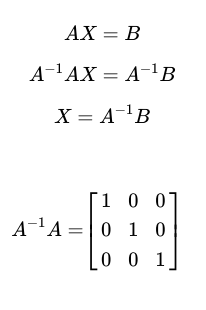

#### solving linear equations using SymPy 

In [1]:
from sympy import *

# 4x + 2y + 4z = 44
# 5x + 3y + 7z = 56
# 9x + 3y + 6z = 72

A = Matrix([
    [4,2,4],
    [5,3,7],
    [9,3,6]
          ])

B = Matrix([44,
           56,
           72
           ])

# inverse of matrix A
A_inv = A.inv()

# solving the linear equation
# in SymPy you use the * operator for matrix multiplication
X = A_inv * B
print('result: {}'.format(X))

result: Matrix([[2], [34], [-8]])


#### solving linear equations using NumPy

In [4]:
import numpy as np
from numpy.linalg import inv

# 4x + 2y + 4z = 44
# 5x + 3y + 7z = 56
# 9x + 3y + 6z = 72

A = np.array([
    [4,2,4],
    [5,3,7],
    [9,3,6]
          ])

B = np.array([44,
           56,
           72
           ])

# inverse of matrix A
A_inv = inv(A)

# solving the linear equation
X = A_inv @ (B)
print('result: {}'.format(X))

result: [ 2. 34. -8.]


# Eigenvectors and Eigenvalues

Eigenvectors and Eigenvalues are a complex topic. But to put it very simple it is a matrix decomposition method. You decompose a matrix into smaller elements that are usefull in many applications and are easier to deal with than the matrix as a whole. Another example of a decomposition is the decomposition of 30 into 5 * 3 * 2.

Each n x n matrix has exactly n Eigenvectors and n Eigenvalues. So a 2 x 2 matrix has 2 Eigenvectors and 2 Eigenvalues.

The picture shows the two eigenvalues of the matrix above (lambda) and the two eigenvecotrs (v) (each row is one eigenvector).

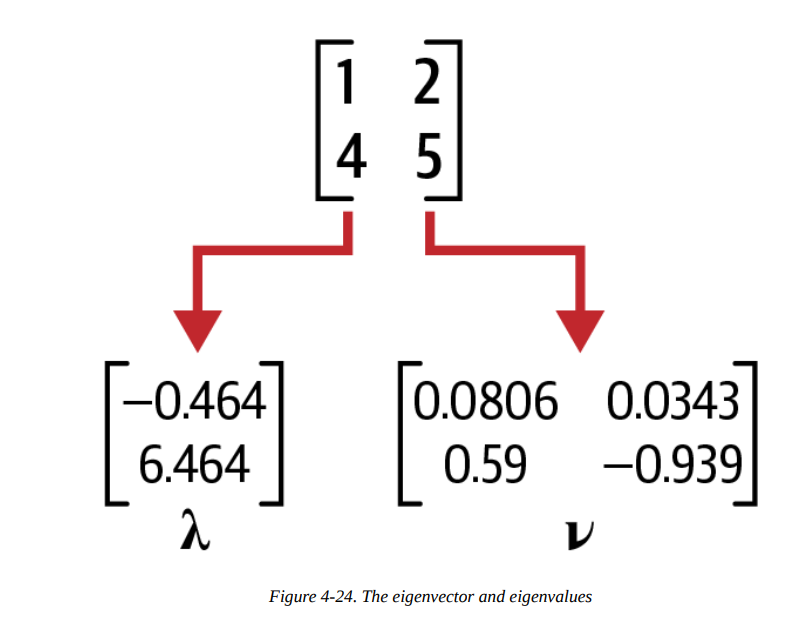

#### eigendecomposition in NumPy

In [1]:
import numpy as np
from numpy.linalg import eig, inv

# matrix to be decomposed
A = np.array([
             [1, 2],
             [4, 5]
            ])

# eigenvalues and eigenvectors
# IMPORTANT: 'eigenvals, eigenvecs' has to be exactly in this order
eigenvals, eigenvecs = eig(A)

print("\noriginal_matrix: {} \neigenvalues: {} \neigenvectors: {}".format(A, eigenvals, eigenvecs))


original_matrix: [[1 2]
 [4 5]] 
eigenvalues: [-0.46410162  6.46410162] 
eigenvectors: [[-0.80689822 -0.34372377]
 [ 0.59069049 -0.9390708 ]]


#### recreating a matrix from its eigenvalues and eigenvectors

It is possible to recreate the matrix from its eigenvalues. The formula below is very important. Here A is out matrix, v are it's egenvectors and lambda are its eigenvalues.

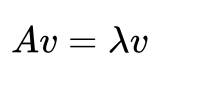

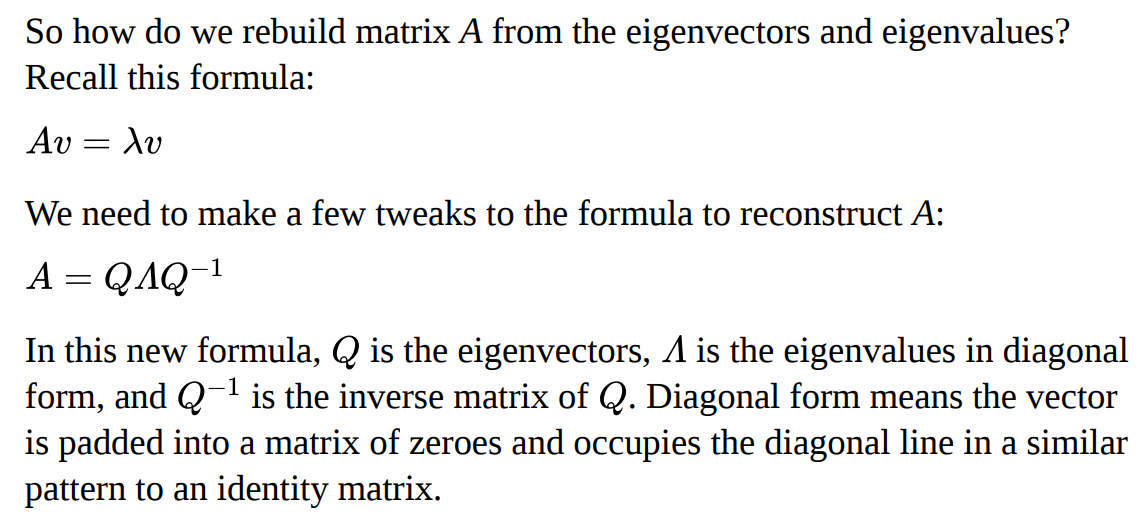

#### decomposing and recomposing a matrix in NumPy 

In [6]:
import numpy as np
from numpy.linalg import eig, inv

# matrix decomposition (matrix ---> eigenvectors + eigenvalues) -------------------------------------------------------------
A = np.array([
 [1, 2],
 [4, 5]
        ])

# IMPORTANT: 'eigenvals, eigenvecs' has to be exactly in this order
eigenvals, eigenvecs = eig(A)

# matrix recomposition (eigenvectors + eigenvalues ----> matrix) ------------------------------------------------------------
Q = eigenvecs            # matrix of eigenvecotrs
Q_inv = inv(Q)   # inverse of matrix Q
L = np.diag(eigenvals)      # eigenvalues in diagonal form
A_recomp = Q @ L @ Q_inv # recomposition of matrix A

print('original matrix: {}\neigenvectors: {}\neigenvalues: {}\ninverse of eigenverctors: {}\neigenvalues in diagonal form: {}\nrecomposed matrix: {}'.format(A, eigenvecs, eigenvals, Q_inv, L, A_recomp))

original matrix: [[1 2]
 [4 5]]
eigenvectors: [[-0.80689822 -0.34372377]
 [ 0.59069049 -0.9390708 ]]
eigenvalues: [-0.46410162  6.46410162]
inverse of eigenverctors: [[-0.97741588  0.35775904]
 [-0.61481016 -0.8398463 ]]
eigenvalues in diagonal form: [[-0.46410162  0.        ]
 [ 0.          6.46410162]]
recomposed matrix: [[1. 2.]
 [4. 5.]]
